<a href="https://colab.research.google.com/github/Abhishek-555/Projects/blob/master/satellite_processing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install "descarteslabs[complete]"
! descarteslabs auth login

    100% |████████████████████████████████| 122kB 5.3MB/s 
    100% |████████████████████████████████| 1.5MB 12.4MB/s 
    100% |████████████████████████████████| 716kB 15.7MB/s 
  Running setup.py bdist_wheel for descarteslabs ... - \ done
  Stored in directory: /root/.cache/pip/wheels/a6/a9/56/e8d4b8ffbf3fffa251bcb8e2f6d206569d970668d6d2aa29e7
  Running setup.py bdist_wheel for blosc ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/83/f4/9a/75519fa177abba9f6409c05fc020d15923e4bae70cad057634
Successfully built descarteslabs blosc
Follow this link to login https://iam.descarteslabs.com/auth/login?refresh_token=true&destination=/auth/refresh_token
...then come back here and paste the generated token: eyJ1c2VyX2lkIjogImdpdGh1Ynw0MzUxNzAwMyIsICJuYW1lIjogImJyb3dzZXJfYXV0

In [0]:
import descarteslabs as dl
import numpy as np
sangre_de_cristo_geojson = {
    "type": "Polygon",
    "coordinates": [[
        [-106, 35.5], [-105, 35.5], [-105, 36.5], [-106, 36.5], [-106, 35.5]
        ]]
}



In [0]:
scenes, geoctx = dl.scenes.search(
    sangre_de_cristo_geojson,
    products=["sentinel-2:L1C", "landsat:LC08:01:T1:TOAR"],
    start_datetime="2016-12-01",
    end_datetime="2018-03-01",
    cloud_fraction=0.1,)

In [0]:
winter_scenes = scenes.filter(
    lambda scene: scene.properties.date.month in [12, 1, 2])

In [6]:
winter_scenes

SceneCollection of 30 scenes
  * Dates: Dec 03, 2016 to Feb 12, 2018
  * Products: landsat:LC08:01:T1:TOAR: 17, sentinel-2:L1C: 13

In [0]:
ndarray_stack = winter_scenes.stack(
    "red green blue",
    geoctx.assign(resolution=150))

In [8]:
ndarray_stack.shape

(30, 3, 737, 606)

In [0]:
winter_composite = np.ma.median(ndarray_stack, axis=0)

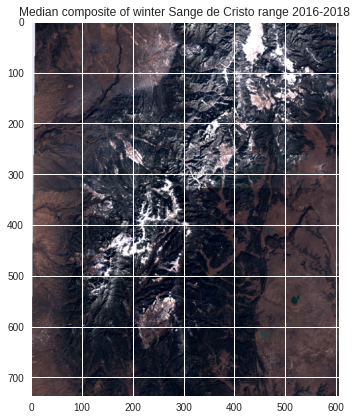

In [10]:
dl.scenes.display(winter_composite, title="Median composite of winter Sange de Cristo range 2016-2018", size=6)